# Data Preprocessing and Training:

### 1. Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the Data:

In [2]:
churndata = pd.read_csv('./telecom-customer-churn-by-maven-analytics/telecom_customer_churn.csv')

In [3]:
churndata.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [4]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

The Column "Customer Status" is our response variable of interest in this analysis. The reasons for Churn has its records in the "Churn Category" and "Churn Reason" columns.
   

### 3. Preprocessing Data:

#### 3.1 Dealing with Missing Data:

The last two columns shows the count and the percentage of the missing values for the columns.

In [5]:
missing1 = pd.concat([churndata.isnull().sum(), 100 * churndata.isnull().mean()], axis=1)
missing1.columns=['count', '%']
missing2 = churndata.isnull().any()
pd.concat([missing2, missing1], axis=1)

,0,count,%
Customer ID,False,0,0.000000
Gender,False,0,0.000000
Age,False,0,0.000000
Married,False,0,0.000000
Number of Dependents,False,0,0.000000
City,False,0,0.000000
Zip Code,False,0,0.000000
Latitude,False,0,0.000000
Longitude,False,0,0.000000
Number of Referrals,False,0,0.000000


In [6]:
df1 = churndata[["Phone Service","Avg Monthly Long Distance Charges","Multiple Lines"]]
df1[df1['Avg Monthly Long Distance Charges'].isnull()]

,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines
10,No,NaN,NaN
14,No,NaN,NaN
16,No,NaN,NaN
19,No,NaN,NaN
25,No,NaN,NaN
...,...,...,...
6979,No,NaN,NaN
6980,No,NaN,NaN
6996,No,NaN,NaN
7016,No,NaN,NaN


From the dataframe slice above, we see that for those who don't have Home Phone service, the Average monthly long distance charges and Multiple lines shows NaN value. We will replace the NaN of "Avg Monthly Long Distance Charges" with 0 and "Multiple Lines" with " No" for those observations who didn't subscribe for Home Phone service."
   

In [7]:
churndata["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
churndata["Multiple Lines"].fillna("No", inplace=True)

In [8]:
df2 = churndata[["Internet Type", "Avg Monthly GB Download", "Online Security", "Online Backup","Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data"]]
df2[df2.isna().any(axis=1)].head()

,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Again, from the dataframe we see that the variables: "Internet Type", "Avg Monthly GB Download", "Online Security", "Online Backup", "Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies", "Streaming Music", "Unlimited Data" - these columns contain NaN for those observations customers who don't have Internet Services. So, we replace the NaN values with corresponding values to the columns mentiones above."
   

In [9]:
del [[missing1, missing2, df1,df2]]  # these are unnecessary for further analysis

In [10]:
churndata["Internet Type"].fillna("None", inplace=True)
churndata["Avg Monthly GB Download"].fillna("0", inplace=True)
churndata["Online Security"].fillna("No", inplace=True)
churndata["Online Backup"].fillna("No", inplace=True)
churndata["Device Protection Plan"].fillna("No", inplace=True)
churndata["Premium Tech Support"].fillna("No", inplace=True)
churndata["Streaming TV"].fillna("No", inplace=True)
churndata["Streaming Movies"].fillna("No", inplace=True)
churndata["Streaming Music"].fillna("No", inplace=True)
churndata["Unlimited Data"].fillna("No", inplace=True)

In [11]:
churndata.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [12]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [13]:
def imputemissing():
    churndata["Avg Monthly Long Distance Charges"].fillna(0, inplace=True)
    churndata["Multiple Lines"].fillna("No", inplace=True)
    churndata["Internet Type"].fillna("None", inplace=True)
    churndata["Avg Monthly GB Download"].fillna("0", inplace=True)
    churndata["Online Security"].fillna("No", inplace=True)
    churndata["Online Backup"].fillna("No", inplace=True)
    churndata["Device Protection Plan"].fillna("No", inplace=True)
    churndata["Premium Tech Support"].fillna("No", inplace=True)
    churndata["Streaming TV"].fillna("No", inplace=True)
    churndata["Streaming Movies"].fillna("No", inplace=True)
    churndata["Streaming Music"].fillna("No", inplace=True)
    churndata["Unlimited Data"].fillna("No", inplace=True)

#### 3.2 Feature Selection:

##### 3.2.1. Delete Unncessary Columns:

In [14]:
# First elimination of unnecessary columns:
churndata.drop(["Customer ID","Zip Code","Latitude","Longitude","Churn Category","Churn Reason"],axis=1,inplace=True)

##### 3.2.2. Feature Elimination:

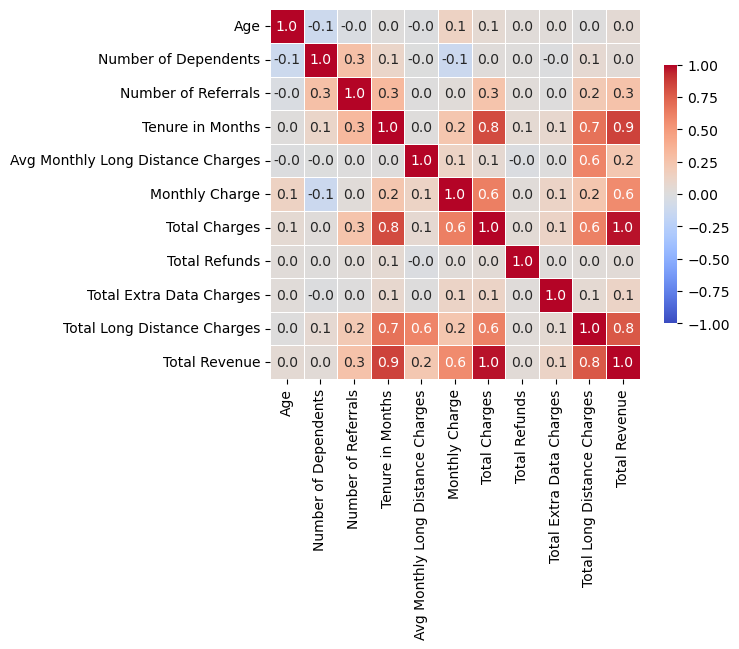

In [15]:
sns.heatmap(churndata.corr(), cmap='coolwarm', vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7},
            annot=True,
            fmt=".1f"
           );

From the data dictionary file, we know that- 
Total Revenue = Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges.


Also, from the matrix bove, we see that-
Tenure in Months 'correlates with' Total Revenue, Total Long Distance Charges, Total Charges

The association can be shown as below-:

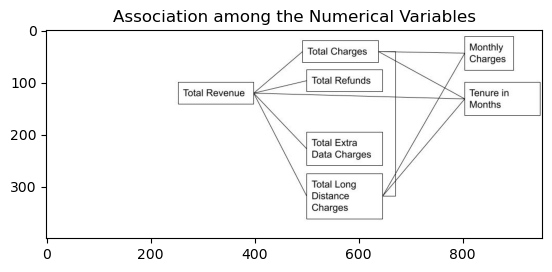

In [16]:
from matplotlib import image as mpimg

plt.title("Association among the Numerical Variables")

image = mpimg.imread("Chart.jpg")
plt.imshow(image)
plt.show()


We will keep the following vabriables - Monthly Charges, Tenure in Months, Total Extra Data Charges, Total Refunds.

We will drop the follwing variables - Total Revenue, Total Charges, Total Long Distance Charges. 

In [17]:
# Second elimination of unnecessary columns:
churndata.drop(["Total Revenue","Total Charges", "Total Long Distance Charges"],axis=1,inplace=True)

#### 3.3 Convert 'Object' type to 'Float' :

In [18]:
churndata["Avg Monthly GB Download"] = churndata["Avg Monthly GB Download"].astype(float)

#### 3.4 Encoding Categorical variables:

We will apply Binary encoding technique to keep control on the high dimensionality of the dataframe after encoding the categorical variables.

In [19]:
list(churndata.select_dtypes(['object']).columns)

['Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status']

In [20]:
list(churndata.select_dtypes(['float64','int64']).columns)

['Age',
 'Number of Dependents',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg Monthly GB Download',
 'Monthly Charge',
 'Total Refunds',
 'Total Extra Data Charges']

In [21]:
df = pd.DataFrame(data=churndata)

In [22]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols = ['Gender',
 'Married',
 'City',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method'], return_df = True)
df = encoder.fit_transform(df)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender_0                           7043 non-null   int64  
 1   Gender_1                           7043 non-null   int64  
 2   Age                                7043 non-null   int64  
 3   Married_0                          7043 non-null   int64  
 4   Married_1                          7043 non-null   int64  
 5   Number of Dependents               7043 non-null   int64  
 6   City_0                             7043 non-null   int64  
 7   City_1                             7043 non-null   int64  
 8   City_2                             7043 non-null   int64  
 9   City_3                             7043 non-null   int64  
 10  City_4                             7043 non-null   int64  
 11  City_5                             7043 non-null   int64

In [24]:
df =pd.get_dummies(df, columns=['Customer Status'])

In [25]:
df.shape

(7043, 61)

In [26]:
churndata["Customer Status"].compare(df["Customer Status_Churned"]).head(50)

,self,other
0,Stayed,0
1,Stayed,0
2,Churned,1
3,Churned,1
4,Churned,1
5,Stayed,0
6,Stayed,0
7,Stayed,0
8,Stayed,0
9,Stayed,0


Customer Status_Churned is our (new) column  of interest.

#### 3.5 Upsampling Data with SMOTE:

In [27]:
# Final Selection of columns for X and y:
X = df.drop(['Customer Status_Churned', 'Customer Status_Joined','Customer Status_Stayed'], axis=1)
y = df["Customer Status_Churned"]

In [28]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
Xsm,ysm = sampler.fit_resample(X, y)

In [29]:
Xsm.shape, ysm.shape

((10348, 58), (10348,))

#### 3.6 Test-Train Split: 

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xsm, ysm, test_size=0.25, random_state=100, stratify=ysm)

In [31]:
X_train.shape, X_test.shape

((7761, 58), (2587, 58))

In [32]:
y_train.shape, y_test.shape

((7761,), (2587,))

#### 3.8 Normalizing Numerical Variables:

From the EDA of the Numerical Values, we got the idea that none of the numecical variables follow Gaussian Distribution. So, we will Normalize our Numerical Values for training purpose.

To avoid data leakage, we will scale our Training and Testing Set seperately.

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

coltran = make_column_transformer((MinMaxScaler(),make_column_selector(dtype_include=np.number)))

X_train = coltran.fit_transform(X_train)                           

### 4. Model Development:

#### 4.1 Model Fitting (Training Different Classifiers):

In [34]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

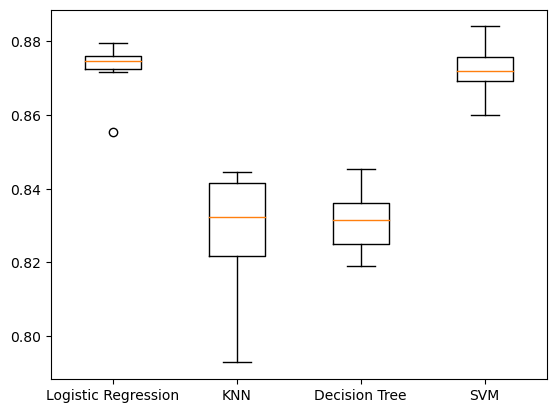

In [35]:
models = {"Logistic Regression": LogisticRegression(solver = 'newton-cg', max_iter = 500, C = 1000),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier(),
          "SVM": SVC(gamma='auto')
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)


plt.boxplot(results, labels= models.keys())
plt.show()

#### 4.2 Model Evaluation:

From the Boxplot and the Accuracy score above, we will consider Logistic Regression Model as our best classifier.

#### 5. Identify Important features:

We will try to identify important features for the classification problem. For this task we will use permutation_importance method from scikit-learn version 0.22. 

d:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
d:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
d:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
d:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
d:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
d:\Users\mahmu\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fi

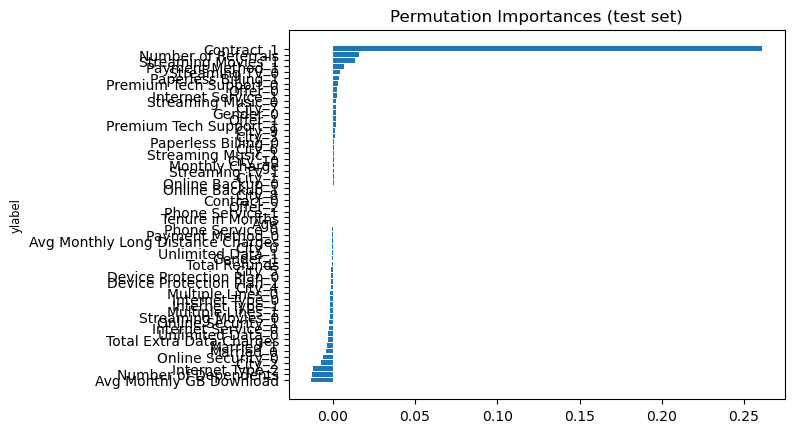

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance


rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)


# the permutation based importance
reslt = permutation_importance(rf, X_test, y_test)

sorted_idx = reslt.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X_test.columns[sorted_idx], reslt.importances[sorted_idx].mean(axis=1).T)
ax.set_ylabel('ylabel', fontsize='small')
ax.set_title("Permutation Importances (test set)")
plt.show()

From the chart above, for this dataset we can fix our observation as- 

Churn is Positively impacted by the features- Contract(highly influential), Number of Referrals.

Churn is Negatively impacted by the features - Number of Dependents, Internet Type, Avg Monthly GB Download, Monthly Charge.

### 5. Pipelines:

#### 5.1 Define the Pipeline:

The steps we will consider to build our pipelines are:

1. Select the influential features for modelling, 
2. Impute Missing Values,
3. Normalize the data to zero mean for numerical data,
4. Encode the Categorical features,
5. Upsample the data using SMOTE,
6. Train a logistic regression model.

All these steps were trained on the train split and then applied to the test split for assessment.

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

feature_cols = ["Contract","Internet Type", "Churn Status","Number of Referrals", "Avg Monthly GB Download","Monthly Charge"]

selector_pipeline = Pipeline([
    ("selector", ColumnTransformer([
        ("selector", "passthrough", feature_cols)
    ], remainder="drop"))
])

In [40]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


categorical_features = ["Contract","Internet Type"]
numerical_features = ["Number of Referrals", "Avg Monthly GB Download","Monthly Charge" ]


categorical_preprocessor = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant',fill_value="None")),
    ('Encoder', OneHotEncoder(drop='if_binary'))
])

numerical_preprocessor = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('Normalizer', MinMaxScaler())
])

preprocessing_pipeline = ColumnTransformer([
    ("categorical_preprocessor", categorical_preprocessor, categorical_features),
    ("numerical_preprocessor", numerical_preprocessor, numerical_features)
])

In [46]:
from sklearn.pipeline import Pipeline

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", LogisticRegression(solver = 'newton-cg', max_iter = 500))
])

#    ("selector", selector_pipeline),
#    ("sampler", SMOTEN()),

#### 5.2 Fit the Pipeline:

In [47]:
complete_pipeline.fit_transform(X_train, y_train)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames

#### 5.2 Save the Pipeline: